<a href="https://colab.research.google.com/github/VictorHolanda21/MachineLearning-PrevisaoFutebol/blob/main/9_Treinamento_Modelo_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando Bibliotecas

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings("ignore")

In [55]:
url_loc_files = '/content/drive/MyDrive/Colab Notebooks/Previsao No Futebol/'

media_classificacao_time = pd.read_csv(url_loc_files + 'media_classificacao_time_3.csv')

media_classificacao_time.head()

,ano,classificacao_time_2,idade,altura_jogador,peso_jogador,qtd_jogadores,media_jogadores,pct_estrangeiro
0,2003,0,40.976190,1.818743,76.018072,168,33.600000,63.095238
1,2003,2,42.301370,1.812329,76.712329,73,24.333333,54.810496
2,2004,2,41.602410,1.820952,76.904762,84,28.000000,47.945205
3,2005,0,39.031250,1.827250,76.925000,160,32.000000,65.662651
4,2005,2,39.295775,1.824366,77.070423,71,23.666667,56.176471


# 2. Modelagem

## 2.1 Dividindo base de treinamento e teste

In [56]:
x = media_classificacao_time.drop(columns=['ano', 'classificacao_time_2','qtd_jogadores'])
y = media_classificacao_time.classificacao_time_2

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3,random_state=42)

In [57]:
print("Qtde linhas (x): ", len(x_treino))
x_treino.head()

Qtde linhas (x):  20


,idade,altura_jogador,peso_jogador,media_jogadores,pct_estrangeiro
13,34.510870,1.832717,77.456522,30.666667,60.638298
15,32.707602,1.827778,76.198830,34.200000,65.402844
11,35.877049,1.822479,75.851240,42.333333,45.161290
17,31.957983,1.824774,76.178470,29.750000,54.347826
1,42.301370,1.812329,76.712329,24.333333,54.810496


## 2.2 Normalizando a base

In [58]:
scaler = MinMaxScaler()
x_treino_scaler = scaler.fit_transform(x_treino)
x_teste_scaler = scaler.transform(x_teste)
x_teste_scaler

array([[-0.01679187,  0.86218388,  0.3506738 ,  0.425     ,  0.84947518],
       [ 0.44387251,  0.43683838,  0.25076658,  0.75      ,  0.63304309],
       [ 0.49784713,  0.4176899 ,  0.35812842,  0.62857143,  1.02902335],
       [ 0.27246464,  1.29434972,  1.02837531,  0.30357143,  0.64938549],
       [ 0.63492912,  0.96122339,  0.2885317 ,  0.375     , -0.07313263],
       [ 0.51809296,  0.47820059,  0.43839182,  0.74642857,  0.80986897],
       [ 0.17453573,  0.66213831,  0.29163429,  0.26428571,  0.82333688],
       [ 0.9196206 ,  0.37681693,  0.3947478 ,  0.53214286,  0.87476868],
       [-0.01691787,  0.67787888,  0.23393213,  0.47321429,  0.60715022]])

## 2.3 Modelo de Regressão Logistica

In [59]:
LR = LogisticRegression(random_state=0)
LR.fit(x_treino, y_treino)
LR.score(x_teste,y_teste) * 100

77.77777777777779

In [60]:
LR_scaler = LogisticRegression(random_state=0)
LR_scaler.fit(x_treino_scaler, y_treino)
LR_scaler.score(x_teste_scaler, y_teste) *100

44.44444444444444

## 2.4 Modelo Árvore de Regressão

In [61]:
DT = DecisionTreeClassifier(random_state=0).fit(x_treino, y_treino)
DT.score(x_teste, y_teste) * 100

66.66666666666666

In [62]:
DT_scaler = DecisionTreeClassifier(random_state=0).fit(x_treino_scaler, y_treino)
DT_scaler.score(x_teste_scaler, y_teste) * 100

66.66666666666666

## 2.5 Avaliando as variáveis mais importantes para o Modelo (Feature Importance)

In [63]:
for i in zip(x.columns, DT.feature_importances_):
  print(i)

('idade', 0.14639639639639643)
('altura_jogador', 0.0)
('peso_jogador', 0.2837837837837839)
('media_jogadores', 0.0)
('pct_estrangeiro', 0.5698198198198197)


Ele considerou idade, peso_jogador e pct_estrangeiro como as variaveis que mais impactam no resultado

altura_jogador e media_jogadores não impactam no resultado, podendo, se for de escolha, excluir do modelo

# 3. Avaliação do Modelo

## 3.1 Importando bibliotecas

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,f1_score,accuracy_score

## 3.2 Realizando a predição(predict) com o algoritimo de reg. logistica

In [65]:
predicao = LR.predict(x_teste)
print(classification_report(y_pred=predicao,y_true=y_teste))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.00      0.00      0.00         1
           2       0.60      1.00      0.75         3

    accuracy                           0.78         9
   macro avg       0.53      0.60      0.55         9
weighted avg       0.76      0.78      0.74         9



## 3.3 Matriz de Confusão

In [66]:
confusion_matrix(y_pred=predicao,y_true=y_teste)

array([[4, 0, 1],
       [0, 0, 1],
       [0, 0, 3]])

Para: <br>
* **Classe 0:** 4/5 (80%)  => 4 acertos e 1 erro de 5 valores
* **Classe 1:** 0/1 (0%)   => 0 acertos de 1 valor
* **Classe 2:** 3/3 (100%) => 3 acertos de 3 valores

<Figure size 504x504 with 0 Axes>

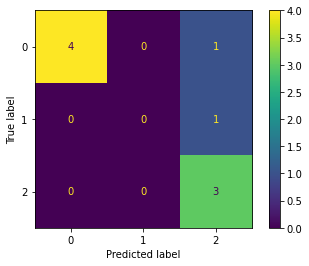

In [67]:
# Matriz de confusão usando plot

plt.figure(figsize=(7,7))
plot_confusion_matrix(LR,x_teste,y_teste)
plt.show()

In [68]:
# Matriz de confusão personalizada

## Calculando a matriz de confusão
cn = confusion_matrix(y_true=y_teste,y_pred = predicao)

## Calculando as % de acertos e erros para a matriz de confusão
percent = (cn*100.0)/np.array(np.matrix(cn.sum(axis=1)).T)
percent

array([[ 80.,   0.,  20.],
       [  0.,   0., 100.],
       [  0.,   0., 100.]])

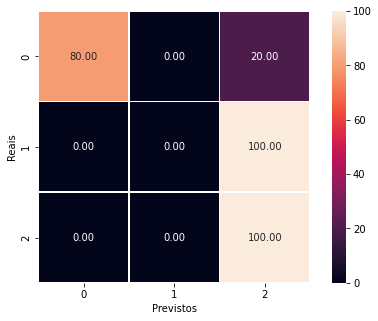

In [69]:
plt.figure(figsize=(8,5))

d = pd.DataFrame(percent)

sns.heatmap(d,vmax=100,vmin=0,annot=True,square=True, fmt=".2f",linewidths=.5)
plt.xlabel('Previstos')
plt.ylabel('Reais')

plt.show()

## 3.4 Calculando o Acuracia e o F-score

In [73]:
## calculando o acuracia
accuracy_p = accuracy_score(y_pred=predicao,y_true=y_teste)*100
print("Acuracia: ", accuracy_p)

## calculando o f-score
f1_score_p = f1_score(y_pred=predicao,y_true=y_teste,average='macro')*100
print("F1-Score: ", f1_score_p)

Acuracia:  77.77777777777779
F1-Score:  54.629629629629626


# 4 Salvando modelo em arquivo

In [80]:
import joblib as jb

modelo = LR
description = 'Modelo de Regressão Logistica para classificar qual a posição possível do time com o atual elenco. \
Foram utilizadas as seguintes colunas: ' + " ','".join(x.columns)
date='05/06/2022'
version='0.1'
name_model='classificacao_times_RL'
metrics = 'acc: {:.3f}% e f1-score: {:.3f}%'.format(accuracy_p,f1_score_p)

dic_save_model = dict({
    'model':modelo,
    'metadata':{
        'description':description,
        'author':'Victor Holanda',
        'date':date,
        'source_code_version': version,
        'metrics':metrics
    }
})

In [81]:
dic_save_model

{'metadata': {'author': 'Victor Holanda',
  'date': '05/06/2022',
  'description': "Modelo de Regressão Logistica para classificar qual a posição possível do time com o atual elenco. Foram utilizadas as seguintes colunas: idade ','altura_jogador ','peso_jogador ','media_jogadores ','pct_estrangeiro",
  'metrics': 'acc: 77.778% e f1score: 54.630%',
  'source_code_version': '0.1'},
 'model': LogisticRegression(random_state=0)}

In [83]:
jb.dump(dic_save_model, url_loc_files+name_model+'.joblib')

['/content/drive/MyDrive/Colab Notebooks/Previsao No Futebol/classificacao_times_RL.joblib']